In [1]:
import sys
sys.path.insert(3,"../pre-processing/3D")
sys.path.insert(1,"../numerical_analysis")
sys.path.insert(2,"../analytical")
sys.path.insert(5,"../post-processing")
import numpy as np
from dolfin import *
import matplotlib.pyplot as plt
import scipy.linalg as sc
import epilysis3D_functions as ep3f
import epilysis_3D
import store
import post_3D
import analytical

In [2]:
meshes_location = "../meshes"
paraview_location = "../paraview"
results_location = "../results"

In [3]:
E = np.array([1000.,500.],dtype = np.longlong)
nu = np.array([0.2,0.2],dtype = np.longlong)
Porosity = []
FEM_Exx_a = []
FEM_Eyy_a = []
FEM_Ezz_a = []
FEM_Gyz_a = []
FEM_Gzx_a = []
FEM_Gxy_a = []
FEM_Kxx_a = []
FEM_Kyy_a = []
FEM_Kzz_A = []
Exx_analytical = []
Eyy_analytical = []
Ezz_analytical = []
Gyz_analytical = []
Gzx_analytical = []
Gxy_analytical = []

In [4]:
for i,name in enumerate(["3D_Layers_05","3D_Layers_07","3D_Layers_1","3D_Layers_12","3D_Layers_15"]):
    store.save_name(name,results_location) #save the name for the post-processing!!!
    #-------------------------------------------------------------------------
    #-------------------------------------------------------------------------
    mesh = Mesh(meshes_location+"/gmsh/" + name + ".xml")
    subdomains = MeshFunction("size_t", mesh, meshes_location+"/gmsh/" + name + "_physical_region.xml")
    a=1
    b=1
    c=1
    vertices = np.array([[0, 0.,0.],#0
                         [a, 0.,0.],#1
                         [a,0.,c],#2
                         [0.,0.,c],#3
                         [0.,b,c],#4
                         [0.,b,0.],#5
                         [a,b,0.],#6
                         [a,b,c]])#7
    vol = a*b*c
    Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz = ep3f.ortho_from_iso(E,nu)
    store.save_E_nu_iso(name,E,nu,results_location) #save E,nu for the post-processing!!!
    #-------------------------------------------------------------------------
    dx,w,Eps,F,a,L = epilysis_3D.fe_problem(mesh,subdomains,vertices,Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz)
    C_guess = epilysis_3D.calculate_moduli(name,mesh,vol,dx,w,Eps,F,a,L,Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz,meshes_location,paraview_location,results_location)
    #-------------------------------------------------------------------------
    C_inv = sc.inv(C_guess)
    FEM_Exx = 1/C_inv[0,0]
    FEM_Eyy = 1/C_inv[1,1]
    FEM_Ezz = 1/C_inv[2,2]
    FEM_Gyz = C_guess[3,3]
    FEM_Gzx = C_guess[4,4]
    FEM_Gxy = C_guess[5,5]
    FEM_Kxx = C_guess[0,0] + 2 * C_guess[0,1]
    FEM_Kyy = C_guess[1,1] + 2 * C_guess[1,2]
    FEM_Kzz = C_guess[2,2] + 2 * C_guess[2,1]
    v_f = epilysis_3D.calculate_Volume_fraction(mesh,subdomains)
    Porosity.append(v_f)
    FEM_Exx_a.append(FEM_Exx)
    FEM_Eyy_a.append(FEM_Eyy)
    FEM_Ezz_a.append(FEM_Ezz)
    FEM_Gyz_a.append(FEM_Gyz)
    FEM_Gzx_a.append(FEM_Gzx)
    FEM_Gxy_a.append(FEM_Gxy)

Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...


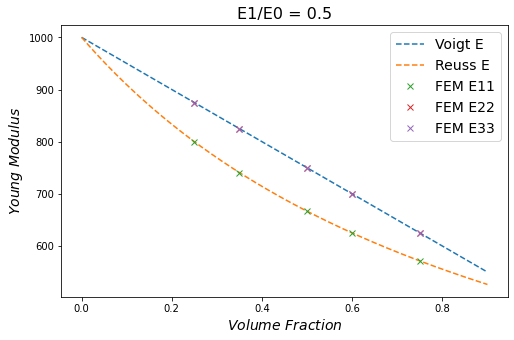

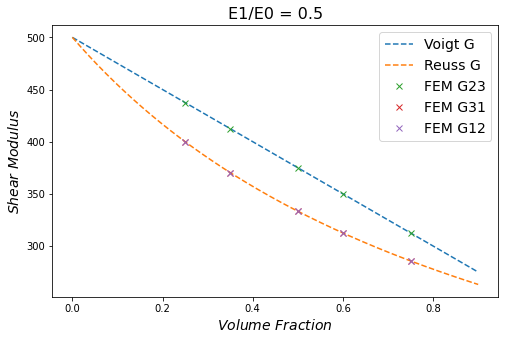

In [5]:
por = np.linspace(0,0.9,1000)
G = E / 2 / (1+nu)
for p in por:
    E_Voigt,E_Reuss = analytical.Voigt_Reuss(1-p,p,E[0],E[1]) #Reuss-Voigt Bounds
    G_Voigt,G_Reuss = analytical.Voigt_Reuss(1-p,p,G[0],G[1])
    Exx_analytical.append(E_Reuss)
    Eyy_analytical.append(E_Voigt)
    Ezz_analytical.append(E_Voigt)
    Gyz_analytical.append(G_Voigt)
    Gzx_analytical.append(G_Reuss)
    Gxy_analytical.append(G_Reuss)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(por,Eyy_analytical,'--',label='Voigt E')
ax1.plot(por, Exx_analytical, '--', label='Reuss E')
ax1.plot(Porosity,FEM_Exx_a,'x',label='FEM E11')
ax1.plot(Porosity,FEM_Eyy_a,'x',label='FEM E22')
ax1.plot(Porosity,FEM_Ezz_a,'x',label='FEM E33')
ax1.set_xlabel('$Volume\ Fraction$', fontsize=14)
ax1.set_ylabel('$Young\ Modulus$', fontsize=14)
ax1.set_title('E1/E0 = {}'.format(E[1]/E[0]), fontsize=16)
ax1.legend(loc='best', fontsize=14)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(por, Gyz_analytical, '--', label='Voigt G')
ax1.plot(por,Gzx_analytical,'--',label='Reuss G')
ax1.plot(Porosity,FEM_Gyz_a,'x',label='FEM G23')
ax1.plot(Porosity,FEM_Gzx_a,'x',label='FEM G31')
ax1.plot(Porosity,FEM_Gxy_a,'x',label='FEM G12')
ax1.set_xlabel('$Volume\ Fraction$', fontsize=14)
ax1.set_ylabel('$Shear\ Modulus$', fontsize=14)
ax1.set_title('E1/E0 = {}'.format(E[1]/E[0]), fontsize=16)
ax1.legend(loc='best', fontsize=14)